![tower_bridge](tower_bridge.jpeg)

As the climate changes, predicting the weather becomes ever more important for businesses. Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of `sklearn` and `MLflow`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

In [81]:
# Run this cell to import the modules you require
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read in the data
weather_df = pd.read_csv("london_weather.csv")

# Exploratory Data Analysis
weather_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [82]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [83]:
weather_df.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [84]:
print(f"The dataframe columns are {weather_df.columns}")

The dataframe columns are Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')


In [85]:
print(f"The dataframe shape is {weather_df.shape}")

The dataframe shape is (15341, 10)


In [86]:
print(f"The time period is from {weather_df["date"].min()} to {weather_df["date"].max()}")

The time period is from 19790101 to 20201231


In [87]:
#Missing values analysis
weather_df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [88]:
len(weather_df)

15341

In [89]:
missing_stats = pd.DataFrame({
            'Missing_Count': weather_df.isnull().sum(),
            'Missing_Percentage': (weather_df.isnull().sum() / len(weather_df)) * 100
        }).sort_values('Missing_Percentage', ascending=False)
print(missing_stats)

                  Missing_Count  Missing_Percentage
snow_depth                 1441            9.393130
mean_temp                    36            0.234665
global_radiation             19            0.123851
cloud_cover                  19            0.123851
precipitation                 6            0.039111
max_temp                      6            0.039111
pressure                      4            0.026074
min_temp                      2            0.013037
date                          0            0.000000
sunshine                      0            0.000000


In [90]:
#Processing Date Feature:
#Convert the date into datetime feature:

weather_df["date_str"] = weather_df["date"].astype(str)
weather_df["datetime"] = pd.to_datetime(weather_df["date_str"])
print(weather_df.head())

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  date_str   datetime  
0      -7.5            0.4  101900.0         9.0  19790101 1979-01-01  
1      -7.5            0.0  102530.0         8.0  19790102 1979-01-02  
2      -7.2            0.0  102050.0         4.0  19790103 1979-01-03  
3      -6.5            0.0  100840.0         2.0  19790104 1979-01-04  
4      -1.4            0.0  102250.0         1.0  19790105 1979-01-05  


In [91]:
#Extract Temporal Features
weather_df["day"] = weather_df["datetime"].dt.day
weather_df["month"] = weather_df["datetime"].dt.month
weather_df["year"] = weather_df["datetime"].dt.year
print(weather_df.head())

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  date_str   datetime  day  \
0      -7.5            0.4  101900.0         9.0  19790101 1979-01-01    1   
1      -7.5            0.0  102530.0         8.0  19790102 1979-01-02    2   
2      -7.2            0.0  102050.0         4.0  19790103 1979-01-03    3   
3      -6.5            0.0  100840.0         2.0  19790104 1979-01-04    4   
4      -1.4            0.0  102250.0         1.0  19790105 1979-01-05    5   

   month  year  
0      1  1979  
1      1  1979  
2      1  1979  


In [92]:
#Seasonal Features
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"
weather_df["season"] = weather_df["month"].apply(get_season)
print(weather_df.head())

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  date_str   datetime  day  \
0      -7.5            0.4  101900.0         9.0  19790101 1979-01-01    1   
1      -7.5            0.0  102530.0         8.0  19790102 1979-01-02    2   
2      -7.2            0.0  102050.0         4.0  19790103 1979-01-03    3   
3      -6.5            0.0  100840.0         2.0  19790104 1979-01-04    4   
4      -1.4            0.0  102250.0         1.0  19790105 1979-01-05    5   

   month  year  season  
0      1  1979  Winter  
1      1  1979  Wi

In [93]:
print(f"\nData spans {weather_df['year'].nunique()} years: {weather_df['year'].min()}-{weather_df['year'].max()}")


Data spans 42 years: 1979-2020


In [94]:
print(f"\nSeasonal distribution: {weather_df['season'].value_counts().sort_index()}")


Seasonal distribution: season
Autumn    3822
Spring    3864
Summer    3864
Winter    3791
Name: count, dtype: int64


In [95]:
print(weather_df.columns)

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth',
       'date_str', 'datetime', 'day', 'month', 'year', 'season'],
      dtype='object')


In [96]:
#Aggregate the data 
weather_metrics = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']
weather_per_month = weather_df.groupby(["year", "month"], as_index=False)[weather_metrics].mean()
print(weather_per_month.head())

   year  month  cloud_cover  sunshine  global_radiation   max_temp  mean_temp  \
0  1979      1     5.724138  1.887097         29.032258   4.116129   0.616129   
1  1979      2     6.360000  1.889286         45.214286   4.532143   2.042857   
2  1979      3     5.967742  3.212903         93.354839   9.238710   5.587097   
3  1979      4     6.133333  3.543333        134.166667  12.520000   8.743333   
4  1979      5     5.290323  6.470968        204.064516  16.206452  11.490323   

   min_temp  precipitation       pressure  snow_depth  
0 -2.551613       1.932258  101214.838710    1.354839  
1 -0.428571       1.571429  101163.928571    0.107143  
2  1.993548       3.061290  100459.032258    0.032258  
3  4.810000       2.586667  101165.333333    0.000000  
4  7.151613       2.806452  101362.580645    0.000000  


C:\Users\MENNAT\AppData\Local\Temp\ipykernel_27080\2346311961.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="year", y="mean_temp", data=weather_per_month, ci=None)


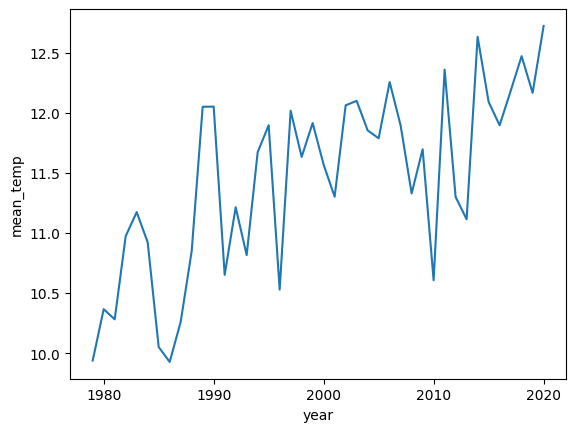

In [97]:
#Visualize the relationship between features in the dataset
sns.lineplot(x="year", y="mean_temp", data=weather_per_month, ci=None)
plt.show()


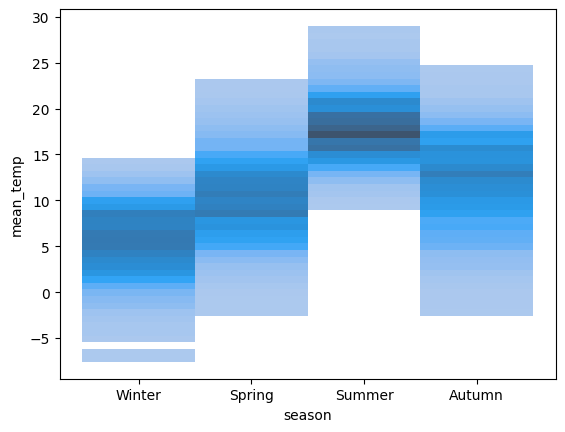

In [98]:
sns.histplot(x="season", y="mean_temp", data=weather_df)
plt.show()


In [99]:
#Choose features, define the target and drop the null values
weather_df.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth',
       'date_str', 'datetime', 'day', 'month', 'year', 'season'],
      dtype='object')

In [100]:
features = ['month', 'cloud_cover', 'sunshine', 'global_radiation',
       'precipitation', 'pressure', 'snow_depth']
target = 'mean_temp'
# Drop the row where the target feature is missing
weather_df = weather_df.dropna(subset=["mean_temp"])

In [101]:
X = weather_df[features]
y = weather_df[target]
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

   month  cloud_cover  sunshine  global_radiation  precipitation  pressure  \
0      1          2.0       7.0              52.0            0.4  101900.0   
1      1          6.0       1.7              27.0            0.0  102530.0   
2      1          5.0       0.0              13.0            0.0  102050.0   
3      1          8.0       0.0              13.0            0.0  100840.0   
4      1          6.0       2.0              29.0            0.0  102250.0   

   snow_depth  
0         9.0  
1         8.0  
2         4.0  
3         2.0  
4         1.0  
(15305, 7)
0   -4.1
1   -2.6
2   -2.8
3   -2.6
4   -0.8
Name: mean_temp, dtype: float64
(15305,)


In [102]:
#Split the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size:\n\tfeatures: {X_train.shape}\n\ttarget feature: {y_train.shape}")
print(f"\nTest set size:\n\tfeatures{X_test.shape}\n\ttarget feature: {y_test.shape}")


Training set size:
	features: (12244, 7)
	target feature: (12244,)

Test set size:
	features(3061, 7)
	target feature: (3061,)


In [103]:
X_train.columns

Index(['month', 'cloud_cover', 'sunshine', 'global_radiation', 'precipitation',
       'pressure', 'snow_depth'],
      dtype='object')

In [104]:
X_train.var()

month               1.179280e+01
cloud_cover         4.284208e+00
sunshine            1.629586e+01
global_radiation    7.910910e+03
precipitation       1.394361e+01
pressure            1.096279e+06
snow_depth          3.217982e-01
dtype: float64

In [105]:
X_train.describe()

,month,cloud_cover,sunshine,global_radiation,precipitation,pressure,snow_depth
count,12244.000000,12230.000000,12244.000000,12226.000000,12242.000000,12242.000000,11088.000000
mean,6.528259,5.272690,4.349665,119.026746,1.661893,101539.264009,0.039412
std,3.434064,2.069833,4.036814,88.943296,3.734114,1047.033586,0.567273
min,1.000000,0.000000,0.000000,8.000000,0.000000,96370.000000,0.000000
25%,4.000000,4.000000,0.400000,41.000000,0.000000,100920.000000,0.000000
50%,7.000000,6.000000,3.500000,95.000000,0.000000,101630.000000,0.000000
75%,10.000000,7.000000,7.200000,186.000000,1.600000,102240.000000,0.000000
max,12.000000,9.000000,16.000000,402.000000,61.800000,104820.000000,22.000000


In [106]:
#Imputing missing values
imputer = SimpleImputer(strategy="mean")
#Fit and transform the training data
X_train_imputed= imputer.fit_transform(X_train)
#Transform the test dataset
X_test_imputed = imputer.transform(X_test)
print(type(X_train_imputed))
print(type(X_train))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [107]:
#Scaling the training and test dataset too have a normal distribution with mean of zero and variance of 1
sc = StandardScaler()
#Fit on the training dataset
X_train_scaled= pd.DataFrame(sc.fit_transform(X_train_imputed), columns= X_train.columns)
#Fit on the test dataset
X_test_scaled = pd.DataFrame(sc.transform(X_test_imputed), columns= X_test.columns)
X_train_scaled.describe()


,month,cloud_cover,sunshine,global_radiation,precipitation,pressure,snow_depth
count,1.224400e+04,1.224400e+04,1.224400e+04,1.224400e+04,1.224400e+04,1.224400e+04,1.224400e+04
mean,5.600080e-17,-3.217870e-16,-1.378258e-16,-2.234229e-17,-4.642553e-17,3.392546e-15,-3.336835e-18
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-1.609895e+00,-2.548961e+00,-1.077544e+00,-1.249257e+00,-4.451115e-01,-4.937661e+00,-7.301146e-02
25%,-7.362594e-01,-6.152528e-01,-9.784515e-01,-8.779454e-01,-4.451115e-01,-5.915186e-01,-7.301146e-02
50%,1.373767e-01,3.516013e-01,-2.104878e-01,-2.590935e-01,-4.451115e-01,8.667068e-02,-7.301146e-02
75%,1.011013e+00,8.350283e-01,7.061142e-01,7.535731e-01,-1.657718e-02,6.693404e-01,-7.301146e-02
max,1.593437e+00,1.801882e+00,2.886140e+00,3.183973e+00,1.610703e+01,3.133747e+00,4.068242e+01
